In [57]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import interpolate
import math
import xlrd
import pylab as pl
from scipy.integrate import tplquad,dblquad,quad
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

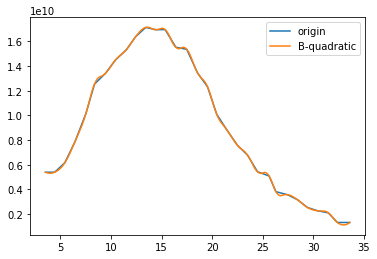

In [59]:
#extract data describing the shape of flux
phi = pd.read_excel('phi_E.xlsx')
energy = phi['E(MeV)']
counts = phi['counts']
pl.plot(energy,counts,label=str("origin"))
#interpolation
num = len(energy)*100
energynew=np.linspace(energy[0],energy[len(energy)-1],num)
f=interpolate.interp1d(energy,counts,kind="quadratic")
countsnew=f(energynew)
#plot
pl.plot(energynew,countsnew,label=str("B-quadratic"))
pl.legend(loc="upper right")
pl.show()

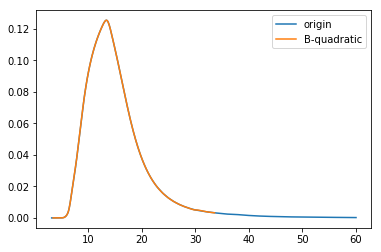

In [60]:
#extract data of the cross section
xs = pd.read_excel('Al_na.xlsx')
#select data in the energy range overlapping with that of flux data
xs_select = xs[(xs["E"]>=energy[0]) & (xs["E"]<=energy[len(energy)-1])]
E_xs = xs_select["E"]
counts_xs = xs_select["counts"]
pl.plot(xs["E"],xs["counts"],label=str("origin"))

f1=interpolate.interp1d(xs["E"],xs["counts"],kind="quadratic")
counts_xsnew=f1(energynew)

pl.plot(energynew,counts_xsnew,label=str("B-quadratic"))
pl.legend(loc="upper right")
pl.show()

In [72]:
phi_times_xs_x = energynew
phi_times_xs_y = countsnew*counts_xsnew
f2=UnivariateSpline(energynew,countsnew*counts_xsnew) 
inte_phi_xs = f2.integral(energynew[0],energynew[len(energynew)-1])
f3=UnivariateSpline(energynew,countsnew) 
inte_phi = f3.integral(energynew[0],energynew[len(energynew)-1])
norm_ave_xs = inte_phi_xs/inte_phi
norm_ave_xs

0.06452816485039338